# Boxplots

(c) 2023-2024 Nick Falk, Rob Edwards

These boxplots are based on Nick's boxplot data, but this uses the "new" format taxonomy data that is the same for MGI and MinION

**Note:** This data uses the raw counts, so if there is a read present we will report that as being detected!

In [16]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [17]:
df = pd.read_csv("../MGI/Taxonomy/MGI_reads_species.rawcounts.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('s__')]
df = df[~df['taxonomy'].str.contains('g__;')]
genus_otu = df.set_index('taxonomy')
genus_otu.index = genus_otu.index.str.split(';').str[-1].str.replace('s__', '')
genus_otu.head()

,768745_20190228_BAL,698917_20180329_S,788707_20171213_S,698917_20171207_S,896213_20180427_S,825012_20181113_S,777599_20180306_S,877469_20190115_S,825012_20171129_S,1162967_20180116_S,...,752797_20170918_S,748699_20190114_S,676138_20171001_S,1465461_20180406_S,753522_20180606_S,1112926_20171212_S,788707_20180313_S,720054_20171120_S,701099_20180517_S,1593973_20180504_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
Candidatus Aegiribacteria sp. MLS_C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Kapaibacterium sp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Kapaibacterium thiocyanatum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Candidatus Stahlbacteria bacterium,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
bacterium (Candidatus Stahlbacteria) CG23_combo_of_CG06-09_8_20_14_all_34_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [18]:
# Normalization/Transformation
# Square root transform
sqrt_genus = np.sqrt(genus_otu)

# Transpose the taxa table
genus_otu2 = sqrt_genus.T
genus_otu2.head()

taxonomy,Candidatus Aegiribacteria sp. MLS_C,Candidatus Kapaibacterium sp.,Candidatus Kapaibacterium thiocyanatum,Candidatus Stahlbacteria bacterium,bacterium (Candidatus Stahlbacteria) CG23_combo_of_CG06-09_8_20_14_all_34_7,bacterium (Candidatus Stahlbacteria) CG23_combo_of_CG06-09_8_20_14_all_40_9,Vermiphilus pyriformis,Candidatus Babela massiliensis,Candidatus Chromulinivorax destructor,Candidatus Ozemobacter sibiricus,...,Roseibacillus sp.,Roseimicrobium gellanilyticum,Sulfuriroseicoccus oceanibius,Verrucomicrobium sp. 3C,Verrucomicrobium sp. GAS474,Verrucomicrobium spinosum,Candidatus Eremiobacter sp. RRmetagenome_bin22,Candidatus Methylomirabilis lanthanidiphila,Candidatus Methylomirabilis limnetica,Candidatus Methylomirabilis oxygeniifera
768745_20190228_BAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
698917_20180329_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
788707_20171213_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
698917_20171207_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
896213_20180427_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.414214,0.0,0.0,0.0,0.0


In [19]:
with open('genus_species.txt', 'w') as out:
    print("\n".join(sorted(list(genus_otu2.columns))), file=out)

In [20]:
# Load metadata table
# This is generic so we can copy/paste. Yes, it should be a function, but its not.

#sequence_type = 'minion_ID'
sequence_type = 'MGI_ID'

metadata = pd.read_csv("../Metadata/CF_Metadata_Table-JCJ-OD-v-2023-03-23-1352.tsv.gz", encoding='utf-8', sep="\t", compression='gzip', index_col=0)
metadata = metadata[~metadata[sequence_type].isna()]
todrop = []
for s in metadata[sequence_type]:
    if s not in genus_otu2.index:
        print(f"ERROR: {s} not found in data frame, dropped from metadata", file=sys.stderr)
        todrop.append(s)

metadata.drop(todrop, inplace=True)

todrop = []
for s in genus_otu2.index:
    if not metadata[sequence_type].str.contains(s).any():
        print(f"ERROR: {s} not found in metadata, dropped from dataframe", file=sys.stderr)
        todrop.append(s)
genus_otu2.drop(todrop, inplace=True)
        
if metadata.shape[0] != genus_otu2.shape[0]:
    print(f"ERROR: we have {metadata.shape[0]} rows in metadata and {genus_otu2.shape[0]} data rows", file=sys.stderr)
metadata.head()

ERROR: 768745_20190228_BAL not found in metadata, dropped from dataframe


,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,3 Omalizumab_SC,"3 piperacillin sodium, tazobactam sodium (Tazocin)_IV",2 prednisolone_PO,1 Sulfamethoxazole – trimethoprim (Bactrim)_PO,3 tobramycin_IV,2 tobramycin_INH,Sum of antibiotics,Sum of meds,Sum of antifungals,Sum of steroid + mabs
unique_ID,,,,,,,,,,,,,,,,,,,,,
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634207_20180510_S,NaN,634207_20180510_S,0,0,634207,2018-05-10T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
634207_20180517_S,NaN,634207_20180517_S,0,0,634207,2018-05-17T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0


In [21]:
# Add "X" character to the beginning of each row name in the metadata table
# We skip this, because it is an R thing, I don't think you can have indexes that start with integers in R?
# metadata.index = 'X' + metadata.index.astype(str)

In [22]:
# Merge the taxa table and metadata table by the shared row names
merged1 = pd.merge(metadata, genus_otu2, left_index=True, right_index=True)
merged1.head()

,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,Roseibacillus sp.,Roseimicrobium gellanilyticum,Sulfuriroseicoccus oceanibius,Verrucomicrobium sp. 3C,Verrucomicrobium sp. GAS474,Verrucomicrobium spinosum,Candidatus Eremiobacter sp. RRmetagenome_bin22,Candidatus Methylomirabilis lanthanidiphila,Candidatus Methylomirabilis limnetica,Candidatus Methylomirabilis oxygeniifera
623361_20180123_S,623361_20180123_S,623361_20180123_S,0,0,623361,2018-01-23T00:00:00Z,OP,RAH,Chest Clinic 9,18,...,2.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.414214
634207_20180510_S,NaN,634207_20180510_S,0,0,634207,2018-05-10T00:00:00Z,IP,WCH,Adol Rm9,17,...,1.0,0.0,0.0,0.0,1.0,2.0,1.414214,0.0,0.0,1.414214
634207_20180517_S,NaN,634207_20180517_S,0,0,634207,2018-05-17T00:00:00Z,IP,WCH,Adol Rm9,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.236068
639354_20171206_S,639354_20171206_S,639354_20171206_S,0,0,639354,2017-12-06T00:00:00Z,IP,WCH,Adolescent 10,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
642660_20180601_S,642660_20180601_S,642660_20180601_S,0,0,642660,2018-06-01T00:00:00Z,IP,WCH,Adol Rm 11,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000


In [23]:
# Note, python allows spaces in column names!
culture_columns = [
    'CS_Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia',
    'NTM',
    'CS_Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare',
    'CS_Staphylococcus  aureus',
    'CS_Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia',
    'CS_Haemophilus influenzae'
]

culture_pairs = {
    'CS_Pseudomonas aeruginosa' : 'Pseudomonas aeruginosa',
    'CS_Stenophotomonas maltophilia': 'Stenotrophomonas maltophilia',
    'NTM' : 'Mycobacterium avium',
    'CS_Mycobacteroides abscessus' : 'Mycobacteroides abscessus',
    'CS_Mycobacterium intracellulare' : 'Mycobacterium avium',
    'CS_Staphylococcus  aureus' : 'Staphylococcus aureus',
    'CS_Achromobacter xylosoxidans' : 'Achromobacter xylosoxidans',
    'CS_Burkholderia cepacia' : 'Burkholderia cepacia',
    'CS_Haemophilus influenzae' : 'Haemophilus influenzae'
}


In [24]:
# Step 2: Create Boxplots
def create_boxplot(data, culture_taxa, taxa):
    subset_data = data[data[culture_taxa].notna()]
    plt.figure(figsize=(10, 6))
    # sns.boxplot(x=culture_taxa, y=taxa, data=subset_data, color='black', boxprops=dict(facecolor='white'))
    sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, legend=False)
    sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, legend=False)
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Abundance in Patient")
    plt.xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
    plt.grid(False)
    plt.tight_layout()
    plt.show()

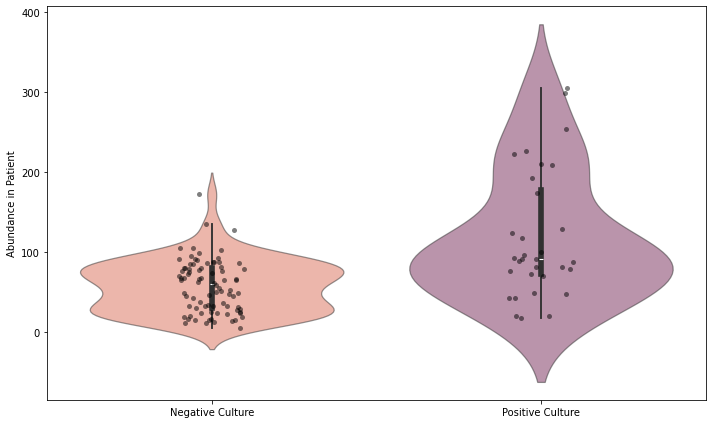

In [25]:
# Example usage
create_boxplot(merged1, "CS_Pseudomonas aeruginosa", "Pseudomonas aeruginosa")

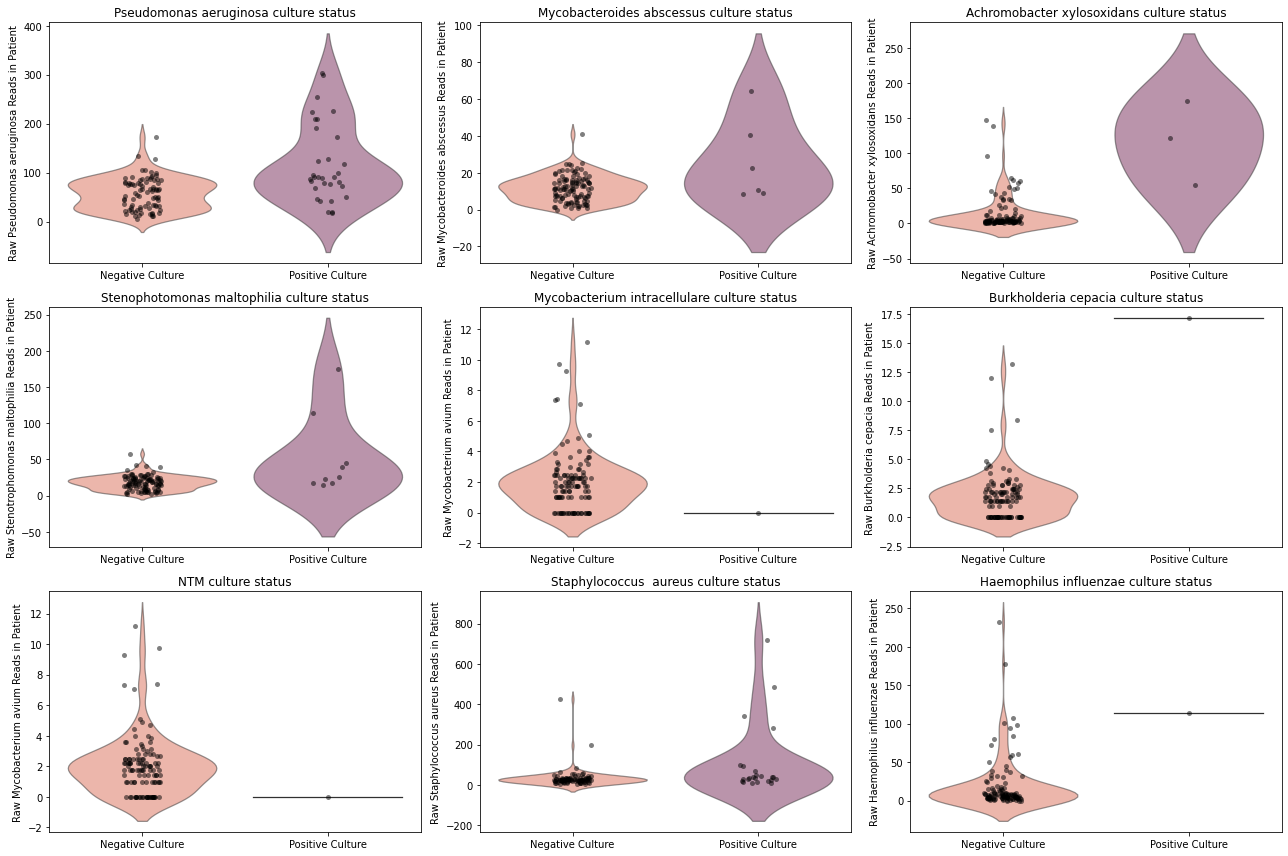

In [36]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[k]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[merged1[culture_taxa].notna()]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False, inner=None)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel(f"Raw {taxa} Reads in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"{culture_taxa.replace('CS_', '')} culture status")
        k+=1
        

plt.tight_layout()
plt.show()
fig.savefig('MGI_species_boxplots.png') 


In [27]:
# Step 3: Additionally Stats Tests
# Perform Kruskal-Wallis Test
kruskal_stat, p_value = stats.kruskal(
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 0.0, 'Pseudomonas aeruginosa'],
    merged1.loc[merged1['CS_Pseudomonas aeruginosa'] == 1.0, 'Pseudomonas aeruginosa']
)
print(f'Kruskal-Wallis Test statistic: {kruskal_stat}, p-value: {p_value}')

Kruskal-Wallis Test statistic: 18.21897266310543, p-value: 1.9690753967643516e-05


In [33]:
culture_taxa = culture_columns[6]
print(f"Taxa is {culture_taxa}")
taxa = culture_pairs[culture_taxa]
print(f"taxa is {taxa}")
subset_data = merged1[merged1[culture_taxa].notna()]
subset_data[subset_data['CS_Achromobacter xylosoxidans'] > 0]

Taxa is CS_Achromobacter xylosoxidans
taxa is Achromobacter xylosoxidans


,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,Roseibacillus sp.,Roseimicrobium gellanilyticum,Sulfuriroseicoccus oceanibius,Verrucomicrobium sp. 3C,Verrucomicrobium sp. GAS474,Verrucomicrobium spinosum,Candidatus Eremiobacter sp. RRmetagenome_bin22,Candidatus Methylomirabilis lanthanidiphila,Candidatus Methylomirabilis limnetica,Candidatus Methylomirabilis oxygeniifera
676138_20171001_S,NaN,676138_20171001_S,0,0,676138,2017-10-01T00:00:00Z,IP,WCH,Adolescent 8,15,...,0.000000,0.0,0.0,0.0,0.0,5.916080,0.0,0.0,0.0,0.0
676138_20171009_S,NaN,676138_20171009_S,0,0,676138,2017-10-09T00:00:00Z,IP,WCH,Adolescent 8,15,...,1.414214,0.0,0.0,0.0,0.0,1.732051,0.0,0.0,0.0,0.0
676138_20180323_S,NaN,676138_20180323_S,0,0,676138,2018-03-23T00:00:00Z,IP,WCH,Adol 3,15,...,0.000000,0.0,0.0,0.0,0.0,2.645751,0.0,0.0,0.0,1.0


In [40]:
patients_with_both = merged1.groupby('Patient.x')['CS_Pseudomonas aeruginosa'].unique()
patients_with_both = patients_with_both[patients_with_both.apply(lambda x: set(x) == {0, 1})]
patients_with_both = list(patients_with_both.index)

In [41]:
patients_with_both

[650003, 658355, 676138, 698564, 715927, 748160, 748699]

,minion_ID,MGI_ID,minion_ID_mismatch_YN,MGI_ID_mismatch_YN,Patient.x,Date.x,IP vs OP,Hospital,Room,Age,...,Roseibacillus sp.,Roseimicrobium gellanilyticum,Sulfuriroseicoccus oceanibius,Verrucomicrobium sp. 3C,Verrucomicrobium sp. GAS474,Verrucomicrobium spinosum,Candidatus Eremiobacter sp. RRmetagenome_bin22,Candidatus Methylomirabilis lanthanidiphila,Candidatus Methylomirabilis limnetica,Candidatus Methylomirabilis oxygeniifera


IndexError: list index out of range

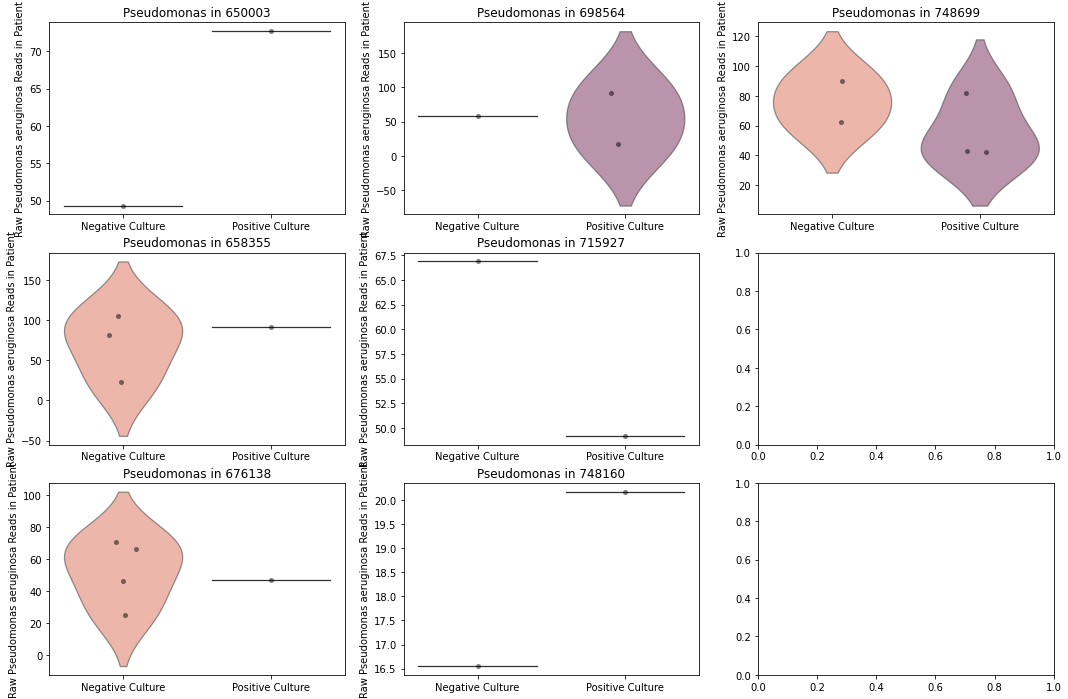

In [48]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=3, ncols=3, sharex=False, sharey=False)

k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        culture_taxa = culture_columns[0]
        taxa = culture_pairs[culture_taxa]
        subset_data = merged1[(merged1[culture_taxa].notna()) & (merged1['Patient.x'] == patients_with_both[k])]
        g = sns.violinplot(x=culture_taxa, y=taxa, data=subset_data, hue=culture_taxa, palette='rocket_r', alpha=0.5, ax=ax[j][i], legend=False, inner=None)
        g = sns.stripplot(x=culture_taxa, y=taxa, data=subset_data, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel(f"Raw {taxa} Reads in Patient")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative Culture", "Positive Culture"])
        g.set_title(f"Pseudomonas in {patients_with_both[k]}")
        k+=1
        

plt.tight_layout()
plt.show()

In [52]:
merged1[merged1['Patient.x'] == 658355][['CS_Pseudomonas aeruginosa', 'Pseudomonas aeruginosa']]

,CS_Pseudomonas aeruginosa,Pseudomonas aeruginosa
658355_20170925_S,0.0,23.494680
658355_20171204_S,0.0,105.394497
658355_20180122_S,0.0,81.553663
658355_20180321_S,1.0,91.454907


In [53]:
merged1[merged1['Patient.x'] == 676138][['CS_Pseudomonas aeruginosa', 'Pseudomonas aeruginosa']]

,CS_Pseudomonas aeruginosa,Pseudomonas aeruginosa
676138_20171001_S,0.0,65.924199
676138_20171009_S,0.0,24.657656
676138_20180130_S,0.0,70.405966
676138_20180323_S,1.0,46.925473
676138_20180405_S,0.0,46.130250
